# Práctica 1 #

Miembros del grupo de prácticas:
- Pavlo Rudak
- Sara Isabel Maza Celdrán
- Guillermo Moro Orozco

## Imports ##

In [1]:
import os
import math
import numpy as np; print(f'Numpy version: {np.__version__}')
import pandas as pd; print(f'Pandas version: {pd.__version__}')
import matplotlib as mpl; print(f'MatPlotLib version: {mpl.__version__}')
import sklearn as sk; print(f'Scikit-Learn version: {sk.__version__}')
import tqdm as tq
import matplotlib as mpl; print(f'MatPlotLib version: {mpl.__version__}')

# Imports functions
from pathlib import Path
from math import ceil
from numpy import abs, logical_and, nan
from pandas import read_csv, DataFrame, get_dummies
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler



Numpy version: 1.23.5
Pandas version: 2.0.3
MatPlotLib version: 3.7.2


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Scikit-Learn version: 1.2.2
MatPlotLib version: 3.7.2


## Data ##

### Read dataset ###

In [2]:
student_mat = "/kaggle/input/student-mat/student-mat.csv"

#Read a dataset
data = pd.read_csv(student_mat, sep =';', decimal='.')

#Print dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

categorical_variables.value_counts().plot.pie(subplots=True, layout=(ceil(len(categorical_variables.columns)/1), 1), sharex=False, sharey=False)

print()### Exploratory Data Analysis (EDA) ###

### Exploratory Data Analysis (EDA) ###


### Data pre-processing ###

In [3]:
# Pre-process the data
data['school'] = data['school'].astype('category')
data['sex'] = data['sex'].astype('category')
data['address'] = data['address'].astype('category')
data['famsize'] = data['famsize'].astype('category')
data['Pstatus'] = data['Pstatus'].astype('category')
data['Mjob'] = data['Mjob'].astype('category')
data['Fjob'] = data['Fjob'].astype('category')
data['reason'] = data['reason'].astype('category')
data['guardian'] = data['guardian'].astype('category')
data['schoolsup'] = data['schoolsup'].astype('category')
data['famsup'] = data['famsup'].astype('category')
data['paid'] = data['paid'].astype('category')
data['activities'] = data['activities'].astype('category')
data['nursery'] = data['nursery'].astype('category')
data['higher'] = data['higher'].astype('category')
data['internet'] = data['internet'].astype('category')
data['romantic'] = data['romantic'].astype('category')

# Print dataset information

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

## Categorical variables ##

In [4]:
categorical_variables = data.select_dtypes(include='category')
print(categorical_variables)
print(categorical_variables.shape)

    school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
0       GP   F       U     GT3       A   at_home   teacher  course   mother   
1       GP   F       U     GT3       T   at_home     other  course   father   
2       GP   F       U     LE3       T   at_home     other   other   mother   
3       GP   F       U     GT3       T    health  services    home   mother   
4       GP   F       U     GT3       T     other     other    home   father   
..     ...  ..     ...     ...     ...       ...       ...     ...      ...   
390     MS   M       U     LE3       A  services  services  course    other   
391     MS   M       U     LE3       T  services  services  course   mother   
392     MS   M       R     GT3       T     other     other  course    other   
393     MS   M       R     LE3       T  services     other  course   mother   
394     MS   M       U     LE3       T     other   at_home  course   father   

    schoolsup famsup paid activities nursery higher

In [5]:
print(categorical_variables.describe().T)

print()

           count unique     top freq
school       395      2      GP  349
sex          395      2       F  208
address      395      2       U  307
famsize      395      2     GT3  281
Pstatus      395      2       T  354
Mjob         395      5   other  141
Fjob         395      5   other  217
reason       395      4  course  145
guardian     395      3  mother  273
schoolsup    395      2      no  344
famsup       395      2     yes  242
paid         395      2      no  214
activities   395      2     yes  201
nursery      395      2     yes  314
higher       395      2     yes  375
internet     395      2     yes  329
romantic     395      2      no  263



**List of categorical columns**


In [6]:
# List of categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

## Bar Plot ##

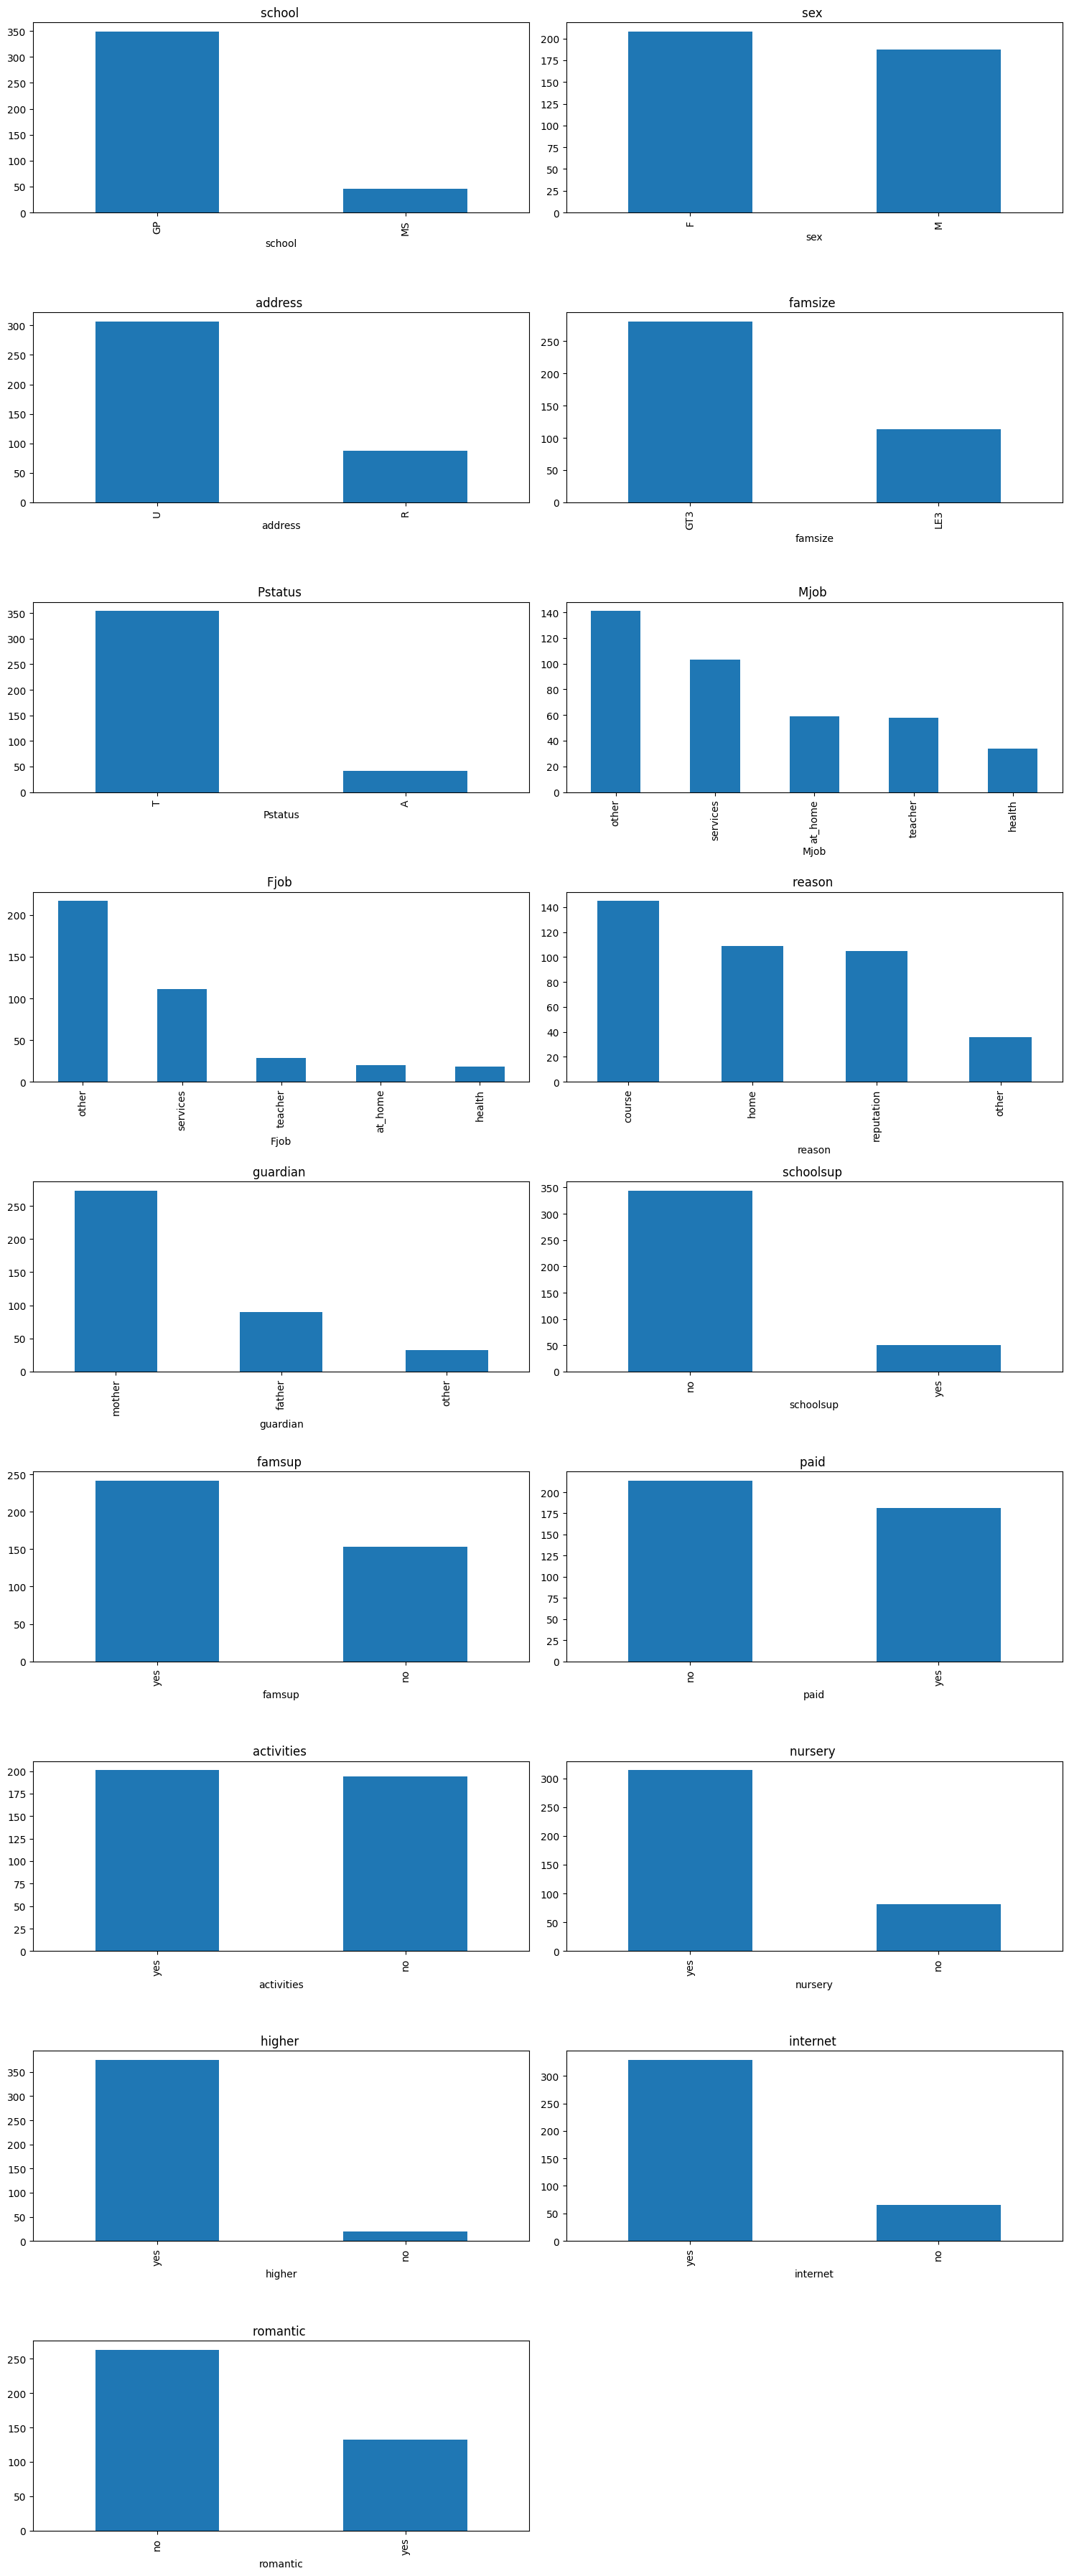

In [7]:

# Plot bar plots for each categorical variable
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))  # Create subplots

for i, col in enumerate(categorical_columns):
    row = i // 2
    col_num = i % 2
    categorical_variables[col].value_counts().plot(kind='bar', ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col} ')

# Hide any empty subplots
for i in range(len(categorical_columns), num_rows * 2):
    row = i // 2
    col_num = i % 2
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()


## Pie Plot ##

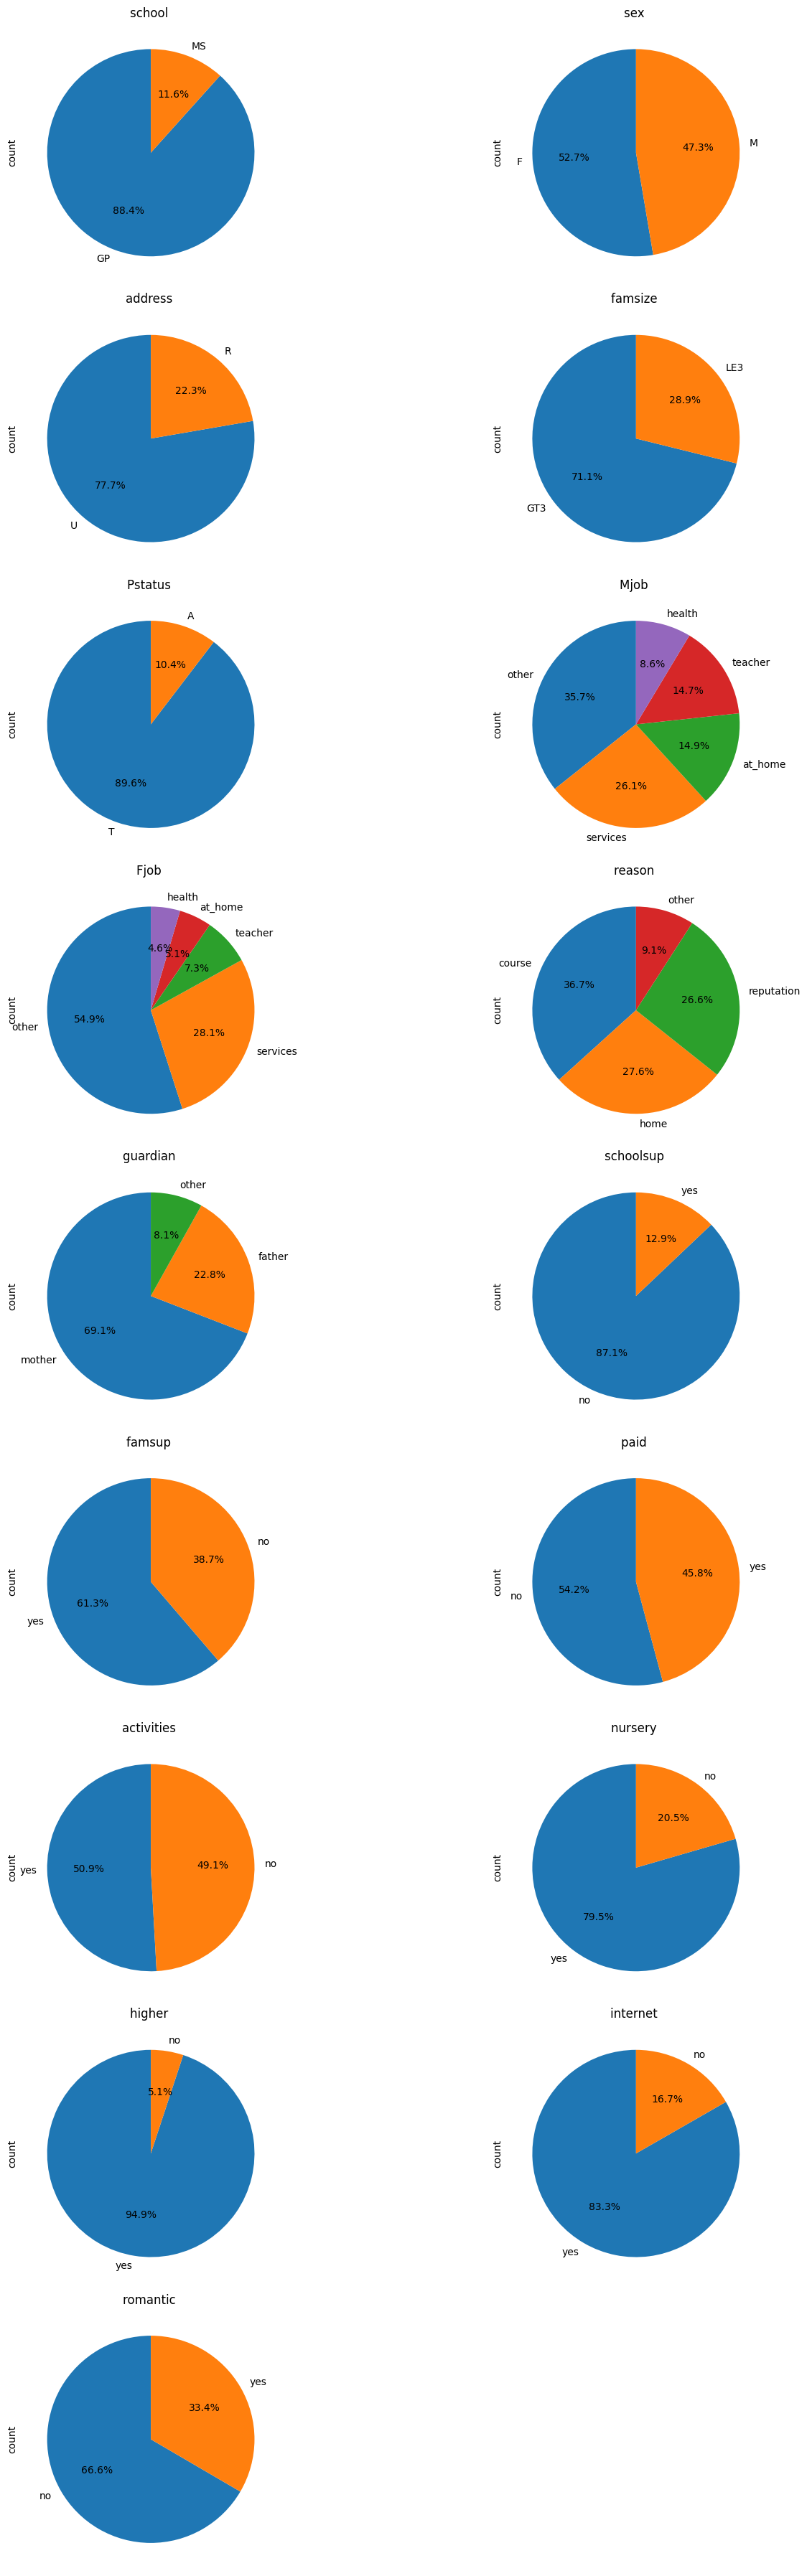

In [8]:


# Plot pie charts for each categorical variable
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))  # Create subplots

for i, col in enumerate(categorical_columns):
    row = i // 2
    col_num = i % 2
    categorical_variables[col].value_counts().plot.pie(ax=axes[row, col_num], autopct='%1.1f%%', startangle=90)
    axes[row, col_num].set_title(f'{col} ')

# Hide any empty subplots
for i in range(len(categorical_columns), num_rows * 2):
    row = i // 2
    col_num = i % 2
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

## Numerical variables ##

In [9]:
int64_variables = data.select_dtypes(include='int64')
print(int64_variables)
print(int64_variables.shape)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
0        4     1     1       3         6   5

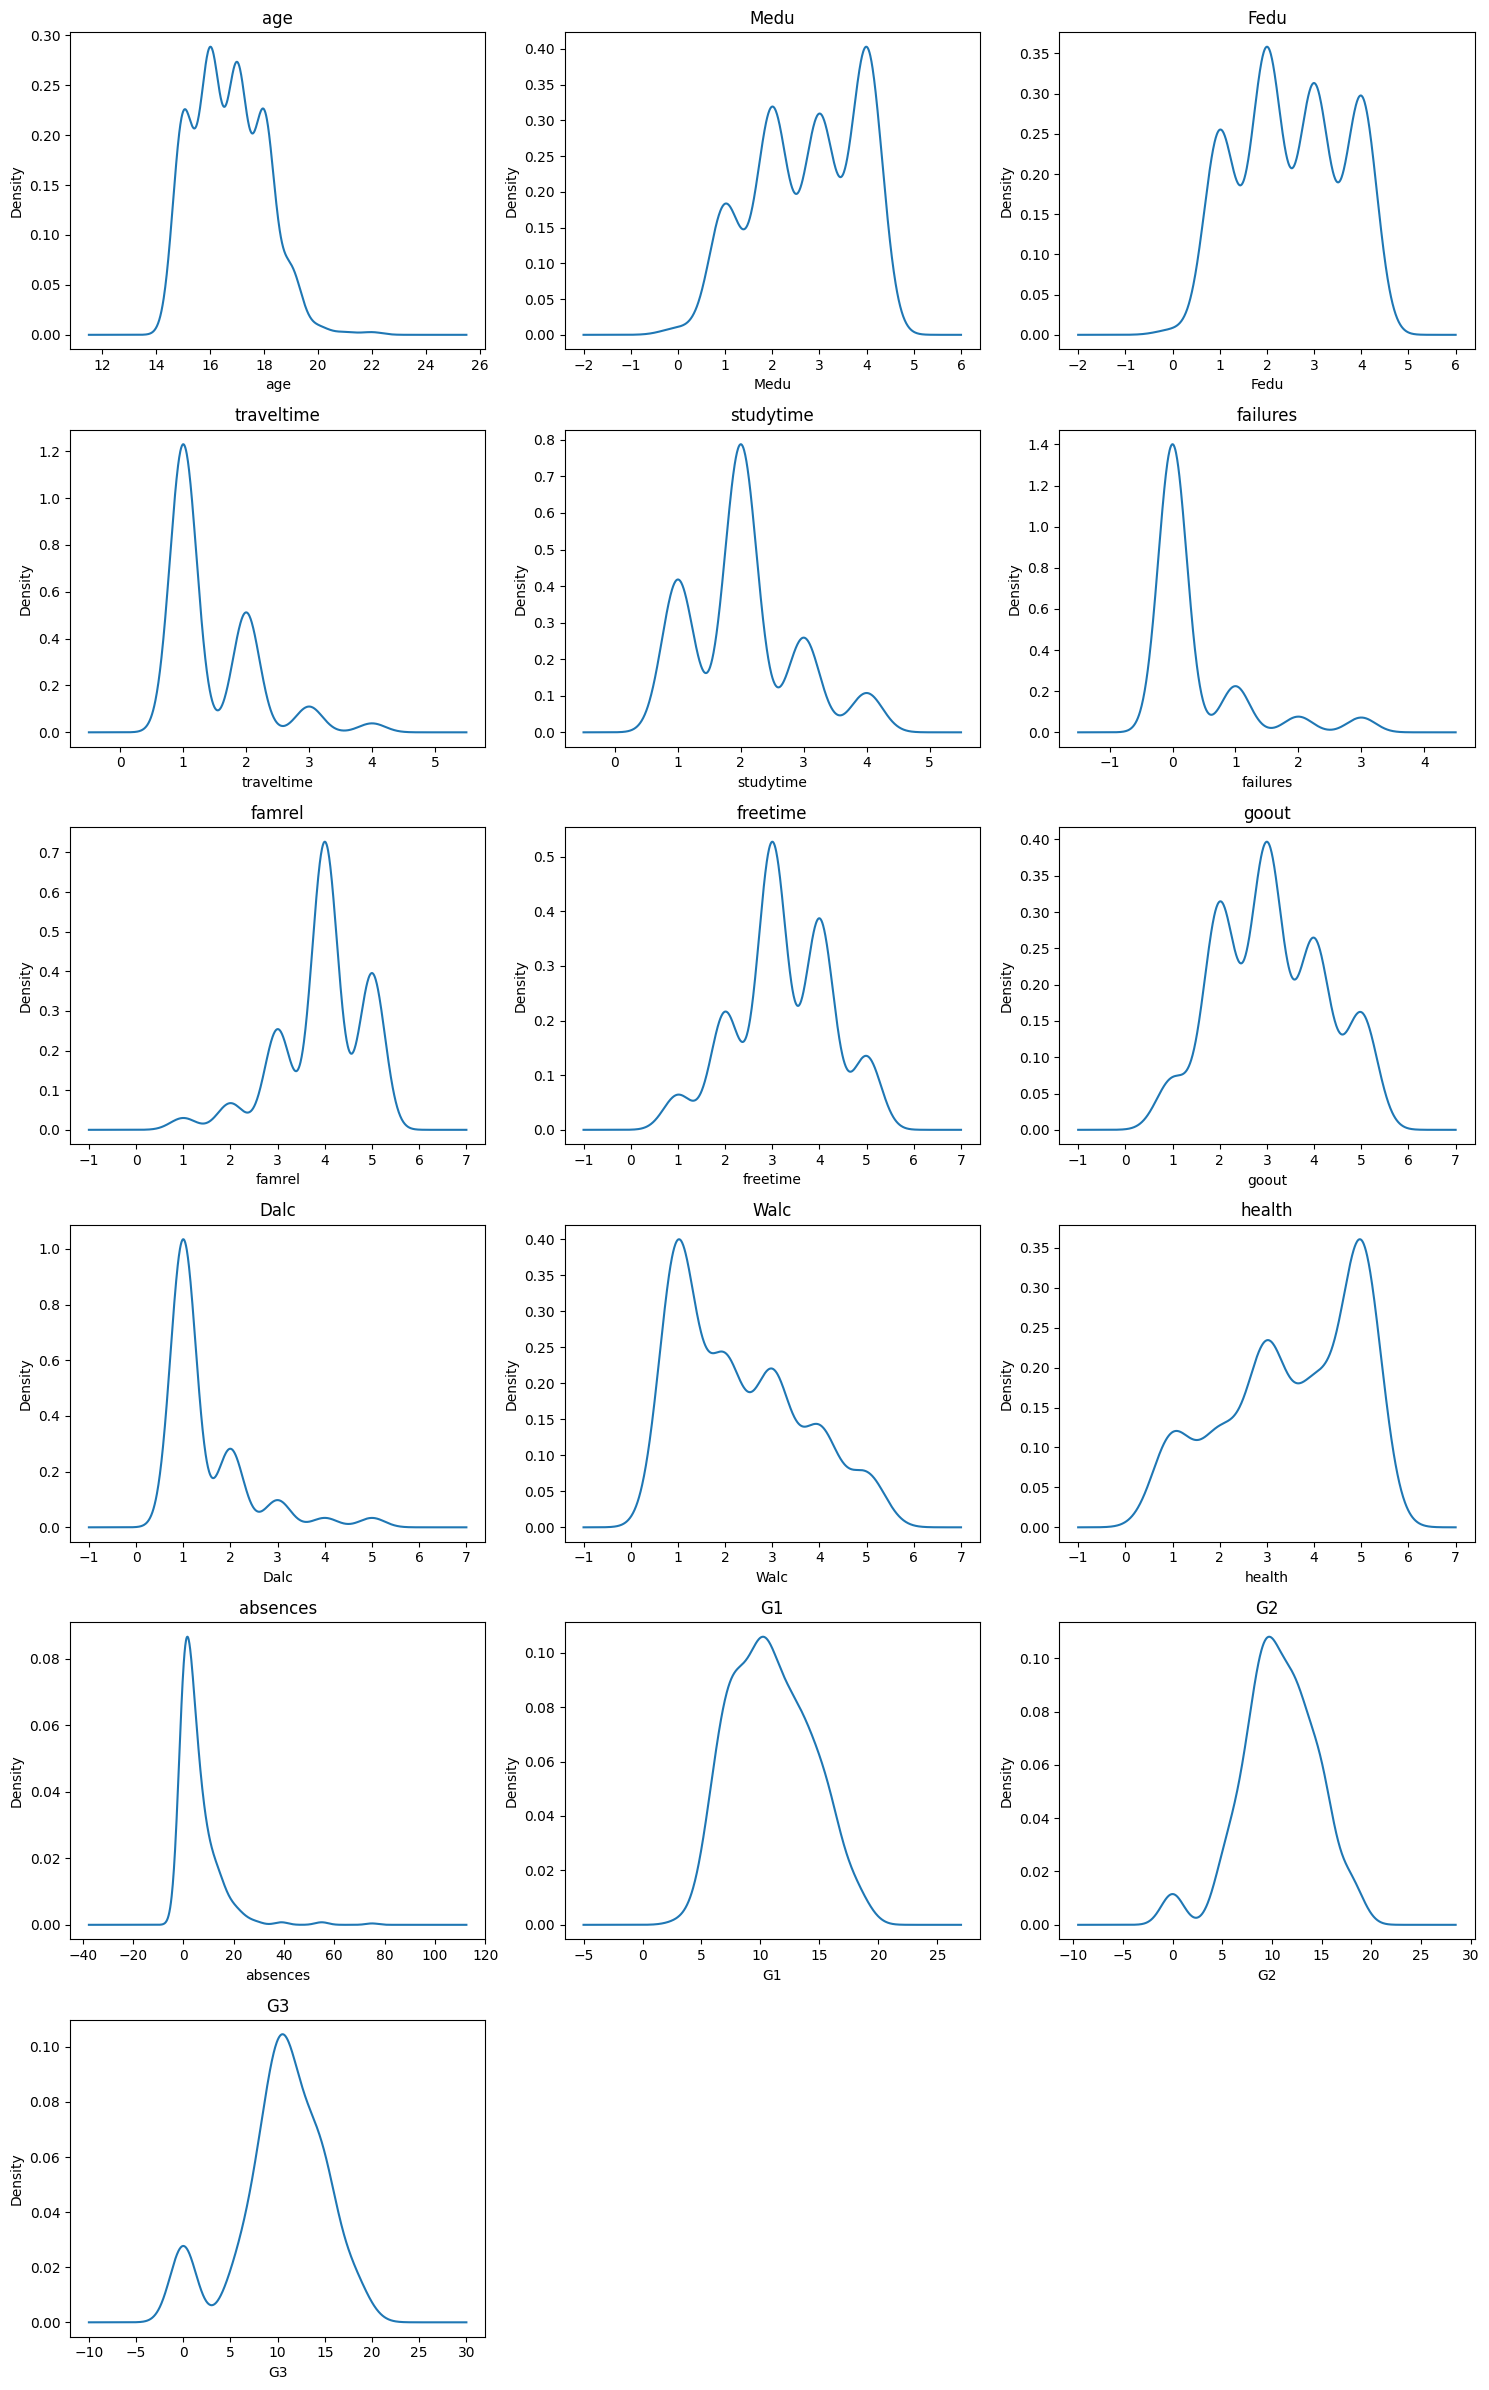

In [10]:
# Histogram plot


# List of numerical columns
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                     'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_cols_per_row = 3  # Number of columns per row
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    data[col].plot.kde(ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col}')
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Density')

# Hide any empty subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

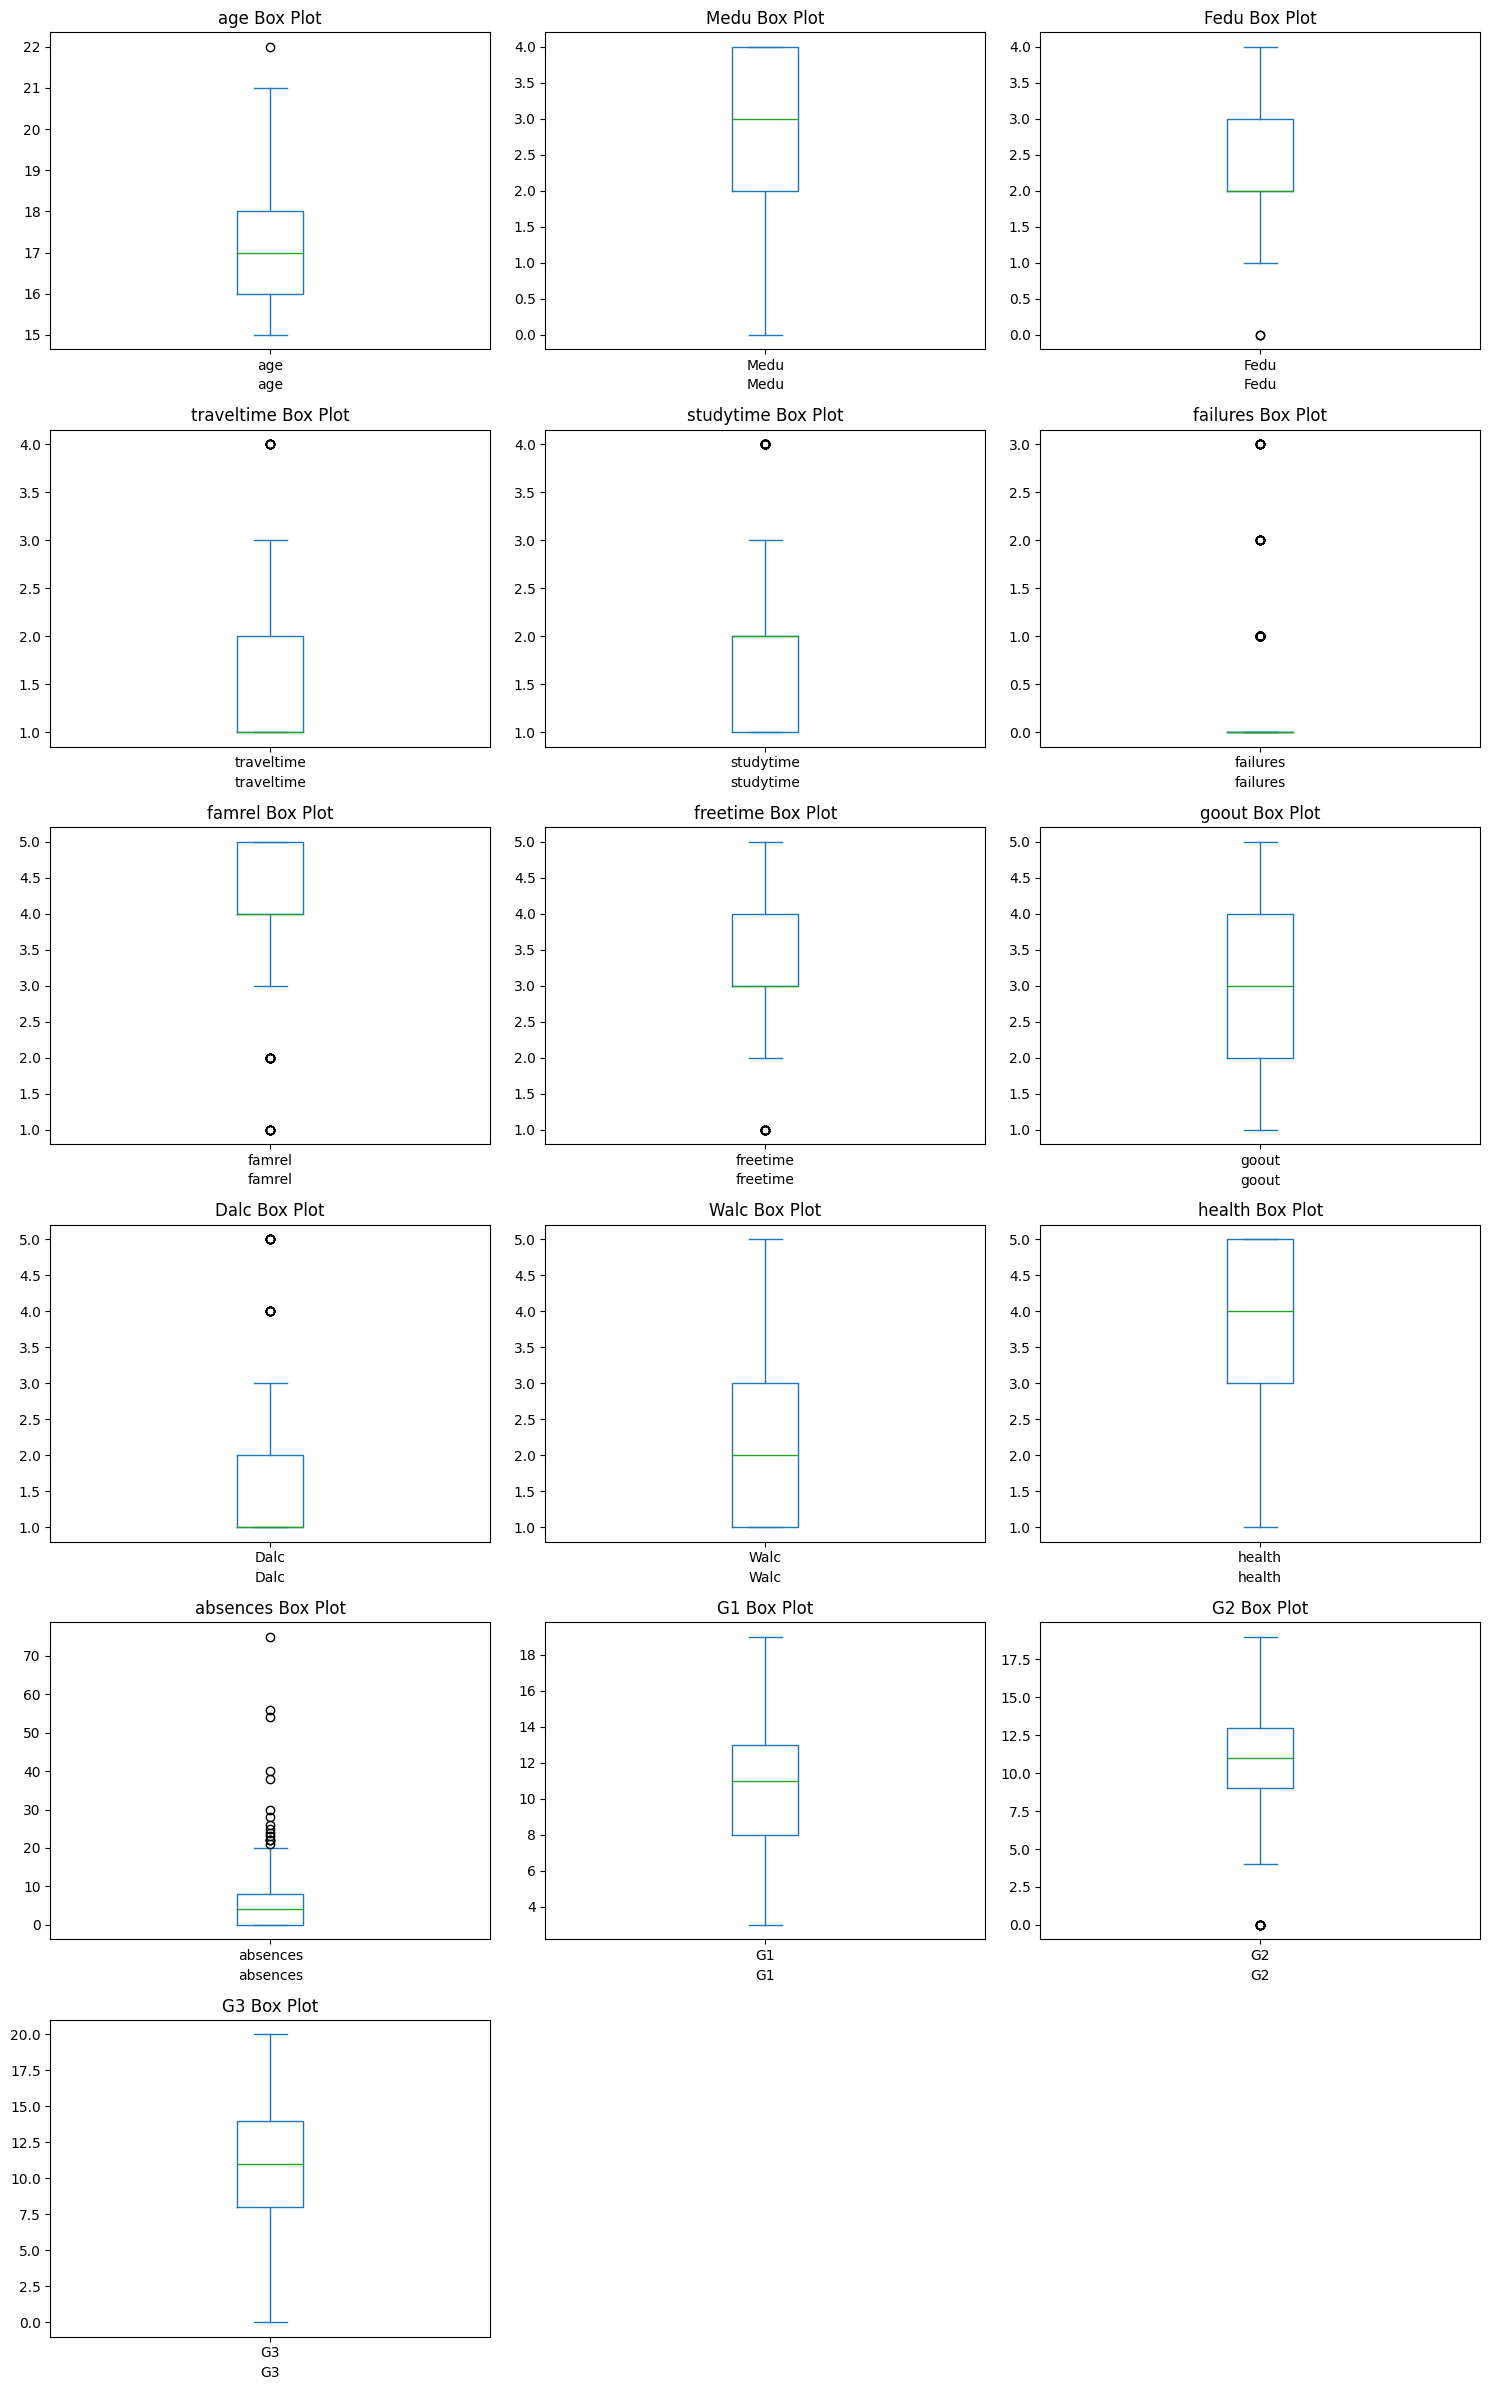

In [11]:
# Box plot

# List of numerical columns
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                     'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_cols_per_row = 3  # Number of columns per row
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    data[col].plot.box(ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col} Box Plot')
    axes[row, col_num].set_xlabel(col)

# Hide any empty subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

### Save cleaned dataset ###

In [12]:
data.to_csv('/kaggle/working/dataset_cleaned.csv', sep=';', decimal='.', index=False)

## Artificial Intelligence (AI) ##

### Machine Learning (ML) ###

#### Model ####

#### Evaluation ####

#### Hyperparametrization ####

### Deep Learning (DL) ###

#### Model ####

#### Evaluation ####

#### Hyperparametrization ####

### Comparison between ML - DL ###